In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded = files.upload()

Saving catanddog.zip to catanddog.zip


In [ ]:
!unzip catanddog.zip -d catanddog/

Archive:  catanddog.zip
   creating: catanddog/test/
   creating: catanddog/test/Cat/
  inflating: catanddog/test/Cat/8100.jpg  
  inflating: catanddog/test/Cat/8101.jpg  
  inflating: catanddog/test/Cat/8102.jpg  
  inflating: catanddog/test/Cat/8103.jpg  
  inflating: catanddog/test/Cat/8104.jpg  
  inflating: catanddog/test/Cat/8105.jpg  
  inflating: catanddog/test/Cat/8106.jpg  
  inflating: catanddog/test/Cat/8107.jpg  
  inflating: catanddog/test/Cat/8108.jpg  
  inflating: catanddog/test/Cat/8109.jpg  
  inflating: catanddog/test/Cat/8110.jpg  
  inflating: catanddog/test/Cat/8111.jpg  
  inflating: catanddog/test/Cat/8112.jpg  
  inflating: catanddog/test/Cat/8113.jpg  
  inflating: catanddog/test/Cat/8114.jpg  
  inflating: catanddog/test/Cat/8115.jpg  
  inflating: catanddog/test/Cat/8116.jpg  
  inflating: catanddog/test/Cat/8117.jpg  
  inflating: catanddog/test/Cat/8118.jpg  
  inflating: catanddog/test/Cat/8119.jpg  
  inflating: catanddog/test/Cat/8120.jpg  
  inflating

In [ ]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
data_path = 'catanddog/train/'
transform = transforms.Compose(
                [
                    transforms.Resize([256, 256]),
                    transforms.RandomResizedCrop(224),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                ])
train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=32,
    num_workers=8,
    shuffle=True
)

print(len(train_dataset))

385


In [ ]:
pip install --upgrade torch

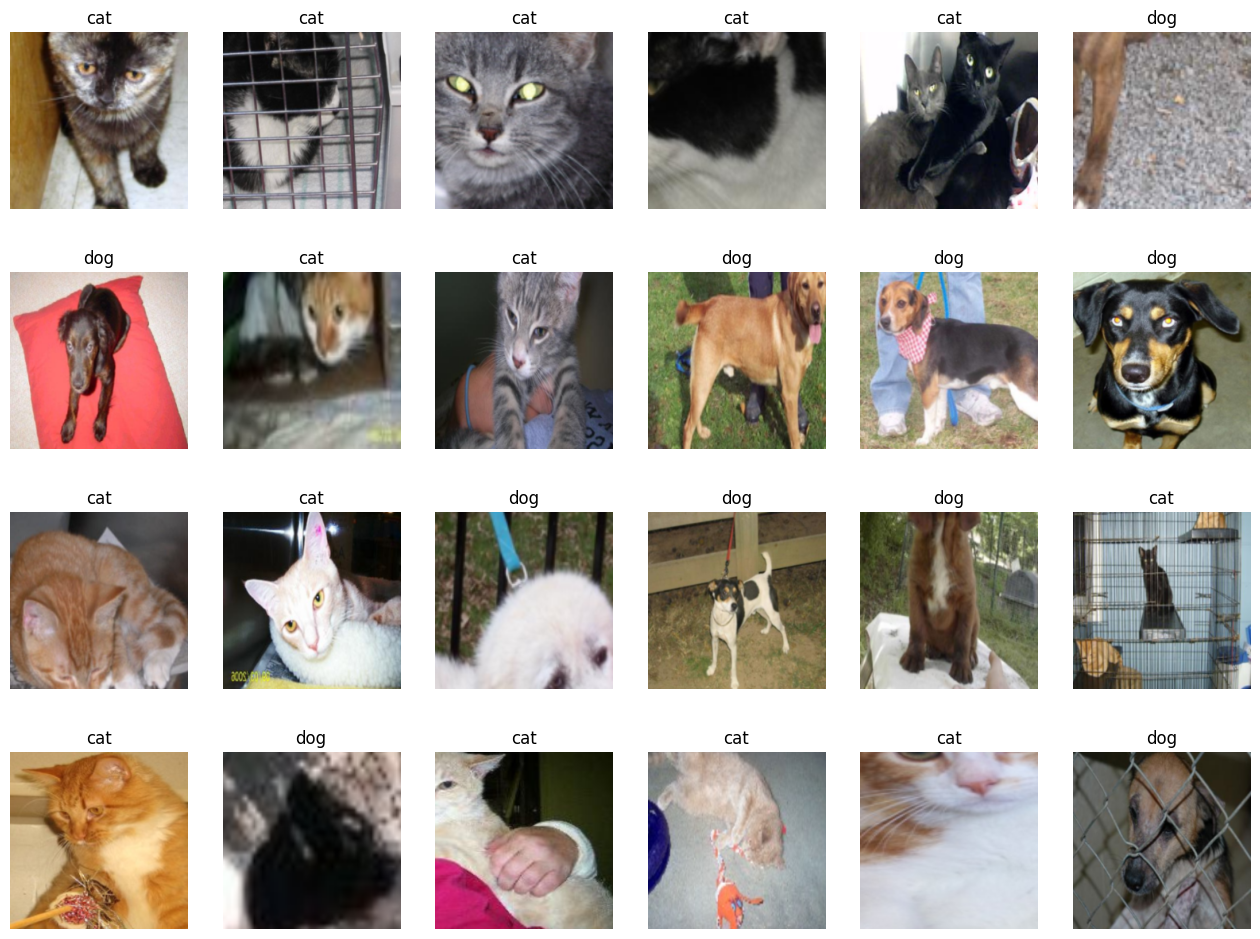

In [ ]:
import numpy as np

samples, labels = next(iter(train_loader))
classes = {0:'cat', 1:'dog'} #개와 고양이에 대한 클래스로 구성
fig = plt.figure(figsize=(16,24))
for i in range(24): #24개의 이미지 데이터 출력
  a = fig.add_subplot(4, 6, i+1)
  a.set_title(classes[labels[i].item()]) #레이블 정보(클래스)를 함께 출력
  a.axis('off')
  a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

In [ ]:
resnet18 = models.resnet18(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 94.7MB/s]


In [ ]:
def set_parameter_requires_grad(model, feature_extracting=True):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False
set_parameter_requires_grad(resnet18)

In [ ]:
resnet18.fc = nn.Linear(512,2) #2는 클래스가 2개라는 의미

In [ ]:
#모델의 파라미터 값 확인
for name, param in resnet18.named_parameters():
  if param.requires_grad:
    print(name, param.data)

fc.weight tensor([[-0.0118,  0.0406,  0.0238,  ...,  0.0365, -0.0324,  0.0122],
        [-0.0068, -0.0024, -0.0200,  ..., -0.0421, -0.0176,  0.0361]])
fc.bias tensor([ 0.0340, -0.0248])


In [ ]:
#모델 객체 생성 및 손실 함수 정의
model = models.resnet18(pretrained=True)

for param in model.parameters():
  param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():
  param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#모델 학습을 위한 함수 생성
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
  since = time.time() #컴퓨터의 현재 시각 구하는 함수
  acc_history = []
  loss_history = []
  best_acc = 0.0

  for epoch in range(num_epochs): #에포크만큼 반복
    print('Epoch {}/{}'.format(epoch, num_epochs-1))
    print('-'*10)

    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in dataloaders: #데이터로더에 전달된 데이터만큼 반복.
      inputs = inputs.to(device)
      labels = labels.to(device)

      model.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      _, preds = torch.max(outputs, 1)
      loss.backward()
      optimizer.step()

      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloaders.dataset)
    epoch_acc = running_corrects.double() / len(dataloaders.dataset)

    print('Loss: {:.4f} ACC: {:.4f}'.format(epoch_loss, epoch_acc))

    if epoch_acc > best_acc:
      best_acc = epoch_acc

    acc_history.append(epoch_acc.item())
    loss_history.append(epoch_loss)
    torch.save(model.state_dict(), os.path.join('catanddog/',
                                                '{0:0=2d}.pth'.format(epoch)))
    print()
  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:0f}s'.format(time_elapsed// 60,
                                                       time_elapsed % 60))
  print('Best Acc: {:4f}'.format(best_acc))
  return acc_history, loss_history



In [ ]:
#파라미터 학습 결과를 옵티마이저에 전달
params_to_update = []
for name, param in resnet18.named_parameters():
  if param.requires_grad == True:
    params_to_update.append(param) #파라미터 학습 결과를 저장
    print("\t", name)
optimizer = optim.Adam(params_to_update) #학습 결과를 옵티마이저에 전달

	 fc.weight
	 fc.bias


In [ ]:
#모델 학습
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss() #손실 함수 지정
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.5270 ACC: 0.7325

Epoch 1/12
----------
Loss: 0.4081 ACC: 0.8338

Epoch 2/12
----------
Loss: 0.3173 ACC: 0.8857

Epoch 3/12
----------
Loss: 0.3001 ACC: 0.8779

Epoch 4/12
----------
Loss: 0.3171 ACC: 0.8571

Epoch 5/12
----------
Loss: 0.2912 ACC: 0.8494

Epoch 6/12
----------
Loss: 0.2736 ACC: 0.8935

Epoch 7/12
----------
Loss: 0.2203 ACC: 0.9143

Epoch 8/12
----------
Loss: 0.2040 ACC: 0.9377

Epoch 9/12
----------
Loss: 0.2053 ACC: 0.9169

Epoch 10/12
----------
Loss: 0.2321 ACC: 0.8961

Epoch 11/12
----------
Loss: 0.1930 ACC: 0.9325

Epoch 12/12
----------


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79782425cdc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79782425cdc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x79782425cdc0>

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/d

Loss: 0.2214 ACC: 0.9273

Training complete in 10m 38.631411s
Best Acc: 0.937662


In [ ]:
#테스트 데이터 호출 및 전처리
test_path = 'catanddog/test/'

transform = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

98


In [ ]:
#테스트 데이터 평가 함수 생성
def eval_model(model, dataloaders, device):
  since = time.time()
  acc_history = []
  best_acc = 0.0

  saved_models = glob.glob('catanddog/' + '*.pth')
  saved_models.sort() #불러온 .pth 파일들 정렬
  print('saved_model', saved_models)

  for model_path in saved_models:
    print('Loading model', model_path)

    model.load_state_dict(torch.load(model_path))
    model.eval()
    model.to(device)
    running_corrects = 0

    for inputs, labels in dataloaders:
      inputs = inputs.to(device)
      labels = labels.to(device)

      with torch.no_grad():
        outputs = model(inputs)

      _, preds = torch.max(outputs.data, 1)
      preds[preds >= 0.5] = 1
      preds[preds < 0.5] = 0
      running_corrects += preds.eq(labels.cpu()).int().sum()
    epoch_acc = running_corrects.double() / len(dataloaders.dataset)
    print('Acc: {:.4f}'.format(epoch_acc))

    if epoch_acc > best_acc:
      best_acc = epoch_acc
      acc_history.append(epoch_acc.item())
      print()
  time_elapsed = time.time() - since
  print('Validation complete in {:.0f}m {:0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  print('Best Acc: {:4f}'.format(best_acc))

  return acc_history

In [ ]:
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['catanddog/00.pth', 'catanddog/01.pth', 'catanddog/02.pth', 'catanddog/03.pth', 'catanddog/04.pth', 'catanddog/05.pth', 'catanddog/06.pth', 'catanddog/07.pth', 'catanddog/08.pth', 'catanddog/09.pth', 'catanddog/10.pth', 'catanddog/11.pth', 'catanddog/12.pth']
Loading model catanddog/00.pth


<ipython-input-62-d5545726b26b>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Acc: 0.9286

Loading model catanddog/01.pth
Acc: 0.9286
Loading model catanddog/02.pth
Acc: 0.9388

Loading model catanddog/03.pth
Acc: 0.9286
Loading model catanddog/04.pth
Acc: 0.9388
Loading model catanddog/05.pth
Acc: 0.9286
Loading model catanddog/06.pth
Acc: 0.9388
Loading model catanddog/07.pth
Acc: 0.9286
Loading model catanddog/08.pth
Acc: 0.9694

Loading model catanddog/09.pth
Acc: 0.9592
Loading model catanddog/10.pth
Acc: 0.9490
Loading model catanddog/11.pth
Acc: 0.9694
Loading model catanddog/12.pth
Acc: 0.9490
Validation complete in 2m 25.825332s
Best Acc: 0.969388


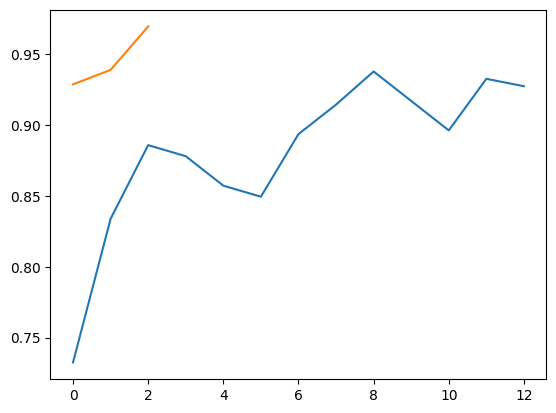

In [ ]:
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

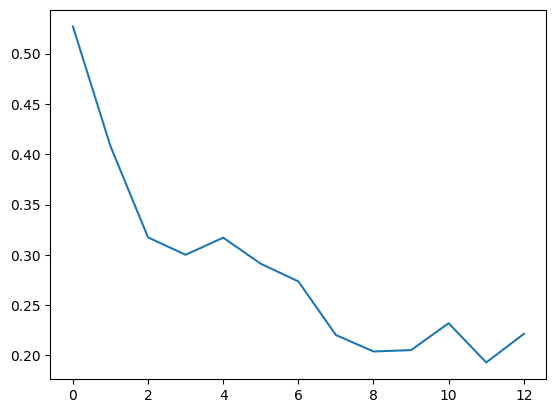

In [ ]:
plt.plot(train_loss_hist)
plt.show()

In [ ]:
#예측 이미지 출력을 위한 전처리 함수
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image*(np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)))
  image = image.clip(0,1)
  return image

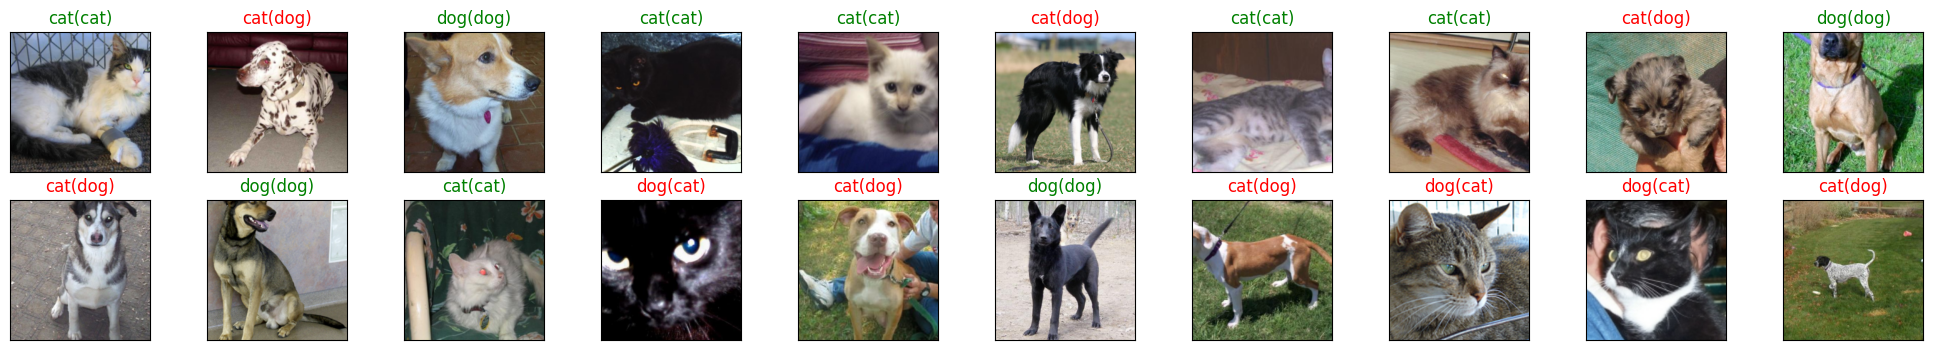

<Figure size 640x480 with 0 Axes>

In [ ]:
classes = {0: 'cat', 1: 'dog'}

dataiter = iter(test_loader)
images, labels = next((dataiter))
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])  # 각 subplot마다 새로운 ax 정의
    plt.imshow(im_convert(images[idx]))
    # 이미지 위에 예측 클래스와 실제 클래스를 함께 출력
    ax.set_title(
        "{}({})".format(
            str(classes[preds[idx].item()]),
            str(classes[labels[idx].item()])
        ),
        color=("green" if preds[idx] == labels[idx] else "red")  # 맞추면 녹색, 틀리면 빨간색
    )
plt.show()
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)



In [ ]:
pip install pillow

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
class XAI(torch.nn.Module):
  def __init__(self, num_classes=2):
    super(XAI, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.Dropout(0.3),
        nn.Conv2d(64,64, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(128, 128, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(128, 256, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(256,256,kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(256,256,kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(256, 512, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(512,512,kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(512,512,kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(512,512,kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.4),
        nn.Conv2d(512,512,kernel_size=3, padding=1, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.classifier = nn.Sequential(
        nn.Linear(512, 512, bias=False),
        nn.Dropout(0.5),
        nn.BatchNorm1d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(512, num_classes)
    )

  def forward(self, x):
    x = self.features(x)
    x = x.view(-1, 512)
    x = self.classifier(x)
    return F.log_softmax(x)

In [4]:
#모델 객체화
model = XAI()
model.to(device)
model.eval()

XAI(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True

In [5]:
#특성 맵을 확인하기 위한 클래스 정의
class LayerActivations:
  features = []
  def __init__(self, model, layer_num):
    self.hook = model[layer_num].register_forward_hook(self.hook_fn)
  def hook_fn(self, module, input, output):
    self.features = output.detach().numpy()

  def remove(self):
    self.hook.remove()

Saving cat.jpg to cat (1).jpg
torch.Size([1, 3, 100, 100])


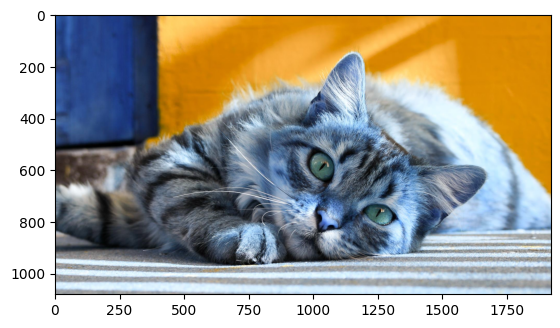

In [6]:
#이미지 호출
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # chap05/data/cat.jpg 데이터 불러오기

img=cv2.imread("cat.jpg")
plt.imshow(img)
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img).unsqueeze(0)

print(img.shape)

In [7]:
#0번째 Conv2d 특성 맵 확인
result = LayerActivations(model.features, 0)

model(img)
activations = result.features

<ipython-input-3-fd1cd2292e5b>:75: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


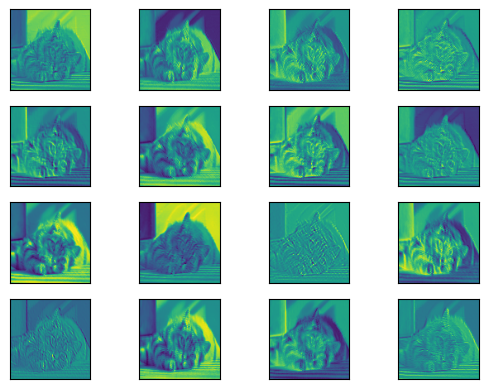

<Figure size 1200x800 with 0 Axes>

In [8]:
#특성 맵 확인
fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for row in range(4):
  for column in range(4):
    axis = axes[row][column]
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.imshow(activations[0][row*10+column])
plt.show()

In [9]:
#20번째 계층에 대한 특성 맵
result = LayerActivations(model.features, 20)
model(img)
activations = result.features

<ipython-input-3-fd1cd2292e5b>:75: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


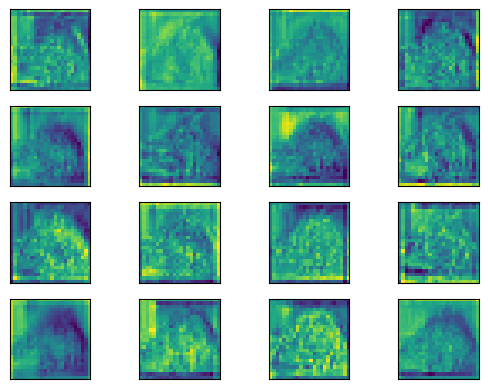

<Figure size 1200x800 with 0 Axes>

In [10]:
#특성 맵 확인
fig, axes = plt.subplots(4, 4)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for row in range(4):
  for column in range(4):
    axis = axes[row][column]
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.imshow(activations[0][row*10+column])
plt.show()

In [11]:
result = LayerActivations(model.features, 40)

model(img)
activations = result.features

<ipython-input-3-fd1cd2292e5b>:75: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


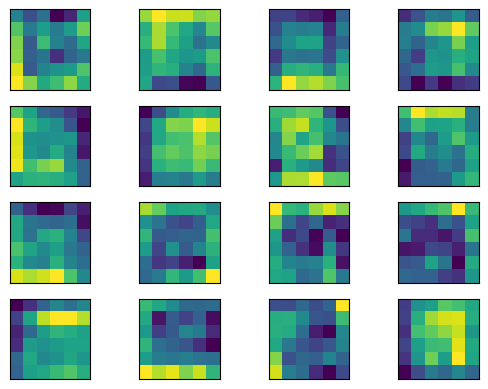

<Figure size 1200x800 with 0 Axes>

In [13]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
  for column in range(4):
    axis = axes[row][column]
    axis.get_xaxis().set_ticks([])
    axis.get_yaxis().set_ticks([])
    axis.imshow(activations[0][row*10+column])
plt.show()